##The following dataset is from the National Institute of Diabetes and Kidney Diseases, India. The goal is to predict whether a patient has diabetes based on diagnostic measurements.

In [120]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [121]:
df= pd.read_csv('https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv?raw=True')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [122]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [123]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [124]:
X = df.drop('Outcome', axis=1).values
y= df['Outcome']

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size= 0.2, random_state=12)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=15)

In [127]:
y_predict = knn.predict(X_test)

In [128]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.5454545454545454

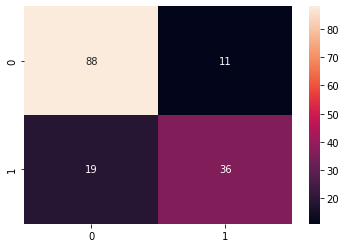

In [129]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [130]:
confusion_matrix(y_test, y_predict)


array([[88, 11],
       [19, 36]])

In [131]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X=X, y=y, cv=15)

from sklearn.metrics import classification_report
print('Classification Report:\n', classification_report(y, predict))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       500
           1       0.69      0.53      0.60       268

    accuracy                           0.75       768
   macro avg       0.73      0.70      0.71       768
weighted avg       0.75      0.75      0.74       768



In [132]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.7659574468085106
recall=0.6545454545454545
f1=0.7058823529411765
accuracy=0.8051948051948052


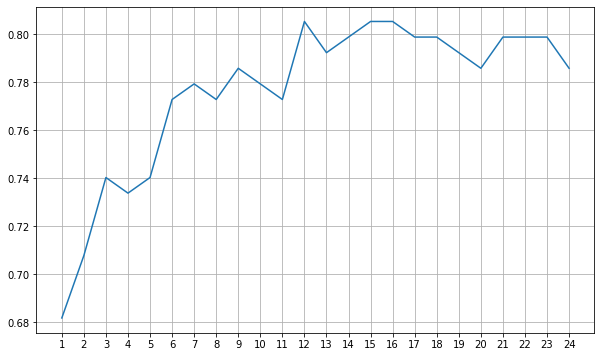

In [133]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(accuracy_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()